In [25]:
import numpy as np
import pandas as pd
import os
import seaborn as sns 
import matplotlib.pyplot as plt

In [26]:
# clinical_2021 = pd.read_csv("clinicaltrial_2021.csv", sep='\\t',lineterminator='\\r', engine='python', header='infer')
clinical_2021 = pd.read_csv("clinicaltrial_2021.csv", sep='|', header=None, engine = 'c')
pharma = pd.read_csv("pharma.csv")
mesh = pd.read_csv("mesh.csv")



In [3]:
pharma.head()

,Company,Parent_Company,Penalty_Amount,Subtraction_From_Penalty,Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting,Penalty_Year,Penalty_Date,Offense_Group,Primary_Offense,Secondary_Offense,...,NAICS_Code,NAICS_Translation,HQ_Country_of_Parent,HQ_State_of_Parent,Ownership_Structure,Parent_Company_Stock_Ticker,Major_Industry_of_Parent,Specific_Industry_of_Parent,Info_Source,Notes
0,Abbott Laboratories,Abbott Laboratories,"$5,475,000",$0,"$5,475,000",2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,...,NaN,NaN,USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/abbott-laborato...,NaN
1,Abbott Laboratories Inc.,AbbVie,"$1,500,000,000",$0,"$1,500,000,000",2012,20120507,healthcare-related offenses,off-label or unapproved promotion of medical p...,NaN,...,NaN,NaN,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,http://www.justice.gov/opa/pr/abbott-labs-pay-...,NaN
2,Abbott Laboratories Inc.,AbbVie,"$126,500,000",$0,"$126,500,000",2010,20101207,government-contracting-related offenses,False Claims Act and related,NaN,...,NaN,NaN,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/pharmaceutical-...,NaN
3,"Abbott Laboratories Puerto Rico, Inc.",Abbott Laboratories,"$49,045",$0,"$49,045",2009,20090305,employment-related offenses,wage and hour violation,Fair Labor Standards Act,...,423450.0,"423450: Medical, Dental, and Hospital Equipmen...",USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,"March 7, 2017 download of a dataset posted by ...",Date and year are the Findings End Date in the...
4,Acclarent Inc.,Johnson & Johnson,"$18,000,000",$0,"$18,000,000",2016,20160722,government-contracting-related offenses,False Claims Act and related,NaN,...,NaN,NaN,USA,New Jersey,publicly traded,JNJ,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/johnson-johnson...,NaN


In [4]:
mesh.head()

,term,tree
0,Calcimycin,D03.633.100.221.173
1,A-23187,D03.633.100.221.173
2,Temefos,D02.705.400.625.800
3,Temefos,D02.705.539.345.800
4,Temefos,D02.886.300.692.800


In [5]:
clinical_2021.shape

(387262, 9)

In [34]:

clinical_2021.columns = ["id","Sponsor","Status","Start","Completion","Type","Submission","Conditions","Interventions"]

In [35]:
clinical_2021.drop(0,inplace=True)

In [8]:
clinical_2021.head()

,id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
1,NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,NaN,NaN
2,NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",NaN
3,NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,NaN
4,NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",NaN
5,NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,"Diverticular Diseases,Diverticulum,Diverticulosis",NaN


In [12]:
clinical_2021.isna().sum()

id                    0
Sponsor               0
Status                0
Start                 0
Completion        13260
Type                  0
Submission            0
Conditions        65131
Interventions    253837
dtype: int64

In [174]:
round((clinical_2021.isna().sum()/clinical_2021.shape[0])*100,2)

id                0.00
Sponsor           0.00
Status            0.00
Start             0.00
Completion        3.42
Type              0.00
Submission        0.00
Conditions       16.82
Interventions    65.55
dtype: float64

In [175]:
nrow = clinical_2021.shape[0]

In [176]:
nrow

387261

In [177]:
clinical_2021.groupby("Type")["id"].count().sort_values(ascending=False)

Type
Interventional                      301472
Observational                        77540
Observational [Patient Registry]      8180
Expanded Access                         69
Name: id, dtype: int64

1. The number of studies in the dataset. You must ensure that you explicitly check distinct studies.
2. You should list all the types (as contained in the Type column) of studies in the dataset along with
the frequencies of each type. These should be ordered from most frequent to least frequent.
3. The top 5 conditions (from Conditions) with their frequencies.
4. Each condition can be mapped to one or more hierarchy codes. The client wishes to know the 5
most frequent roots (i.e. the sequence of letters and numbers before the first full stop) after this is
done.
To clarify, suppose your clinical trial data was:
NCT01, ... ,"Disease_A,Disease_B",
NCT02, ... ,Disease_B,
And the mesh file contained:
Disease_A A01.01 C23.02
Disease_B B01.34.56
The result would be
B01 2
A01 1
C23 1
5. Find the 10 most common sponsors that are not pharmaceutical companies, along with the number
of clinical trials they have sponsored. Hint: For a basic implementation, you can assume that the
Parent Company column contains all possible pharmaceutical companies.
6. Plot number of completed studies each month in a given year – for the submission dataset, the year
is 2021. You need to include your visualization as well as a table of all the values you have plotted
for each month

In [178]:
type_of_study = clinical_2021.groupby("Type")["id"].count().sort_values(ascending=False).reset_index()
type_of_study.columns = ["Type","count"]

In [179]:
type_of_study


,Type,count
0,Interventional,301472
1,Observational,77540
2,Observational [Patient Registry],8180
3,Expanded Access,69


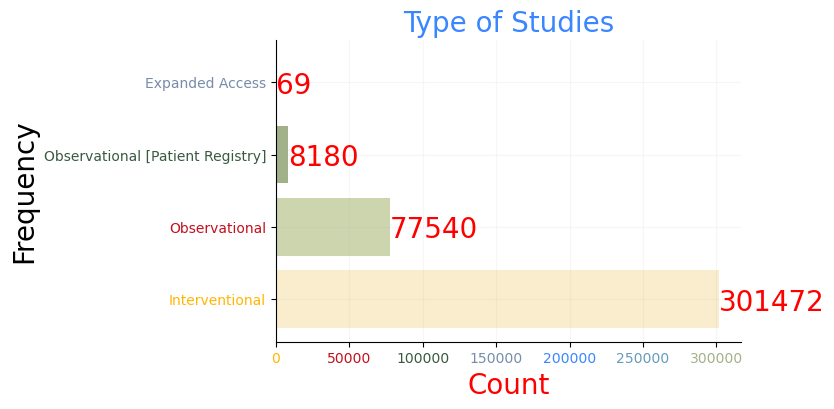

In [180]:
fig = plt.figure(dpi=100)
ax = fig.subplots()
color = ["#faedcd","#ccd5ae","#a3b18a","#415a77"]
bar = ax.barh("Type","count",data=type_of_study,color=["#faedcd","#ccd5ae","#a3b18a","#415a77"])
for i,b in enumerate(bar):
    y = b.get_y()
    w = b.get_width()
    ax.text(w,y+(0.25),w,color="red",fontsize=20)
for sp in ["top","right"]:
    ax.spines[sp].set_visible(False)
ylabels = ["#ffb703","#c1121f","#3a5a40","#778da9","#3a86ff","#669bbc","#a3b18a","#415a77"]
for i , y  in enumerate(ax.get_yticklabels()):
    y.set_color(ylabels[i])
    y.set_fontsize(10)
for i ,x in enumerate(ax.get_xticklabels()):
    x.set_color(ylabels[i])
    x.set_fontsize(10)
ax.set_title("Type of Studies",fontsize=20,color="#3a86ff")
ax.set_xlabel("Count",fontsize=20,color="red")
ax.set_ylabel("Frequency",fontsize=20,color="k")
ax.grid(alpha=0.10)

In [181]:
import matplotlib as mpl

In [182]:
freqency = (type_of_study["count"]/type_of_study["count"].sum()*100)

In [183]:
Type = type_of_study[["Type"]]
Type["Freqency"] = freqency
Type

,Type,Freqency
0,Interventional,77.847240
1,Observational,20.022672
2,Observational [Patient Registry],2.112271
3,Expanded Access,0.017817


In [184]:
Type["Freqency"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4 entries, 0 to 3
Series name: Freqency
Non-Null Count  Dtype  
--------------  -----  
4 non-null      float64
dtypes: float64(1)
memory usage: 160.0 bytes


Text(0.5, 1.0, 'Type of Studies')

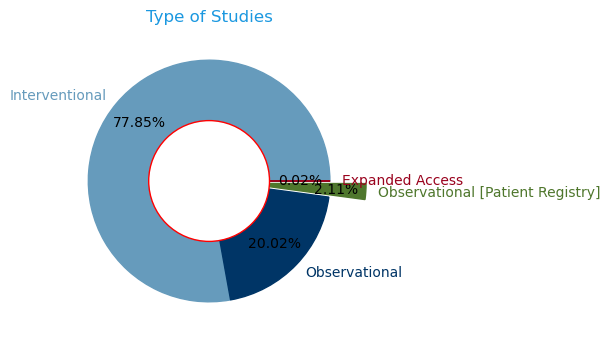

In [185]:

fig = plt.figure(dpi=100)
ax = fig.subplots()
Wedge,label,ps = ax.pie("Freqency",labels="Type",data=Type,autopct="%.2f%%",pctdistance=0.75,explode=[0,0,0.3,0])
my_circle = mpl.patches.Circle((0,0),0.5,facecolor="white",edgecolor="red")
ax.add_artist(my_circle)
color = ["#669bbc","#003566","#4f772d","#9a031e"]
for i,(w,l,p) in enumerate(zip(Wedge,label,ps)):
    w.set_color(color[i])
    l.set_color(color[i])
ax.set_title("Type of Studies",color="#1b98e0")




In [186]:
plt.rcParams["figure.figsize"] = 12,6
plt.rcParams["xtick.major.pad"] = 5
plt.rcParams['xtick.major.pad'] = 5
plt.rcParams['ytick.major.pad'] = 5
plt.rcParams["ytick.major.pad"] = 5
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams['legend.fontsize'] = 10

In [187]:
clinical_2021["Conditions"].dropna(inplace=True)

In [188]:
clinical_2021["Conditions"].isna().sum()

65131

In [189]:
conditions = clinical_2021["Conditions"].str.split(",")
new_conditions = []
for cond in conditions.values:
    if cond is not np.nan:
        new_conditions.extend(cond)
conditions = pd.Series(new_conditions)


In [190]:
top_condition = conditions.value_counts().head(10).reset_index()
top_condition.columns = ["condition","Frequency"]
top_condition

,condition,Frequency
0,Carcinoma,13389
1,Diabetes Mellitus,11080
2,Neoplasms,9371
3,Breast Neoplasms,8640
4,Syndrome,8032
5,Leukemia,5904
6,Lung Neoplasms,5598
7,COVID-19,5567
8,Lymphoma,5395
9,Hypertension,5364


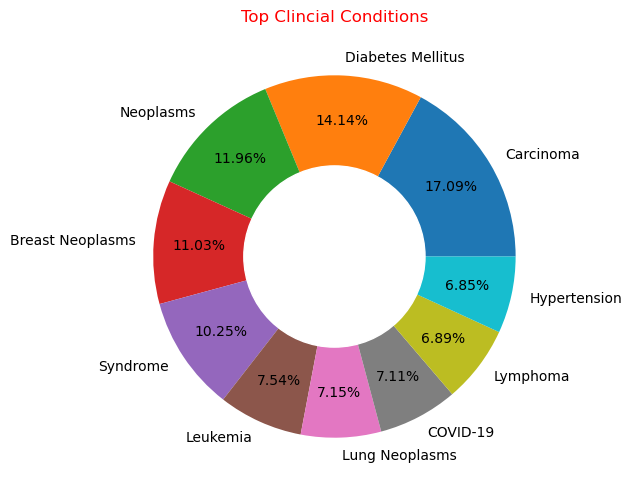

In [191]:
plt.figure(dpi=100)
plt.pie("Frequency",labels="condition",data=top_condition,autopct="%.2f%%",pctdistance=0.75)
ax = plt.gca()
plt.grid(alpha=0.2)
my_circle =  plt.Circle((0,0),radius=0.5,color="white")
ax.add_artist(my_circle)
plt.title("Top Clincial Conditions",color="red")
plt.show()

Each condition can be mapped to one or more hierarchy codes. The client wishes to know the 5 most frequent roots (i.e. the sequence of letters and numbers before the first full stop) after this is done. To clarify, suppose your clinical trial data was: NCT01, ... ,"Disease_A,Disease_B", NCT02, ... ,Disease_B, And the mesh file contained: Disease_A A01.01 C23.02 Disease_B B01.34.56 The result would be B01 2 A01 1 C23 1

In [84]:
mesh.head()

,term,tree
0,Calcimycin,D03.633.100.221.173
1,A-23187,D03.633.100.221.173
2,Temefos,D02.705.400.625.800
3,Temefos,D02.705.539.345.800
4,Temefos,D02.886.300.692.800


In [192]:
mesh["tree"].unique()

array(['D03.633.100.221.173', 'D02.705.400.625.800',
       'D02.705.539.345.800', ..., 'L01.296.110.150.500',
       'G07.265.216.500.400.500', 'G11.561.200.500.400.500'], dtype=object)

In [193]:
clinical_2021.head()

,id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
1,NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,NaN,NaN
2,NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",NaN
3,NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,NaN
4,NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",NaN
5,NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,"Diverticular Diseases,Diverticulum,Diverticulosis",NaN


In [194]:
mesh["code"] = mesh["tree"].str.split(".",expand=True)[0]


In [195]:
mesh_codes = mesh[["term","code"]]
mesh_codes.head()

,term,code
0,Calcimycin,D03
1,A-23187,D03
2,Temefos,D02
3,Temefos,D02
4,Temefos,D02


In [196]:
mesh_codes.set_index("term",inplace=True)

In [197]:
mesh_codes.head()

,code
term,
Calcimycin,D03
A-23187,D03
Temefos,D02
Temefos,D02
Temefos,D02


In [142]:
trial_data = conditions.reset_index().drop("index",axis=1).copy()
trial_data.columns = ["condition"]
trial_data

,condition
0,Autistic Disorder
1,Autism Spectrum Disorder
2,Diabetes Mellitus
3,Tuberculosis
4,Lung Diseases
...,...
595372,Lymphoma
595373,Leukemia
595374,Leukemia
595375,Glaucoma


In [198]:
mesh_codes.reset_index(inplace=True)
mesh_codes.columns = ["condition","code"]

In [199]:
mesh_codes.loc[(mesh_codes["code"]=="A01")&(mesh_codes["condition"]=="Abdomen")].count()

condition    1
code         1
dtype: int64

In [227]:
codes = mesh_codes.merge(trial_data,on="condition")
# codes.head(50)
mesh_codes.loc[mesh_codes["condition"]=="Abdomen"].count()
codes = codes.groupby("code").count()
codes = codes.sort_values("condition",ascending=False).reset_index()
codes.columns = ['codes',"count"]

In [228]:
codes.head(10)

,codes,count
0,C04,143994
1,C23,136079
2,C01,106674
3,C14,94523
4,C10,92310
5,C06,85646
6,C08,70720
7,C13,42599
8,C18,41276
9,C12,40161


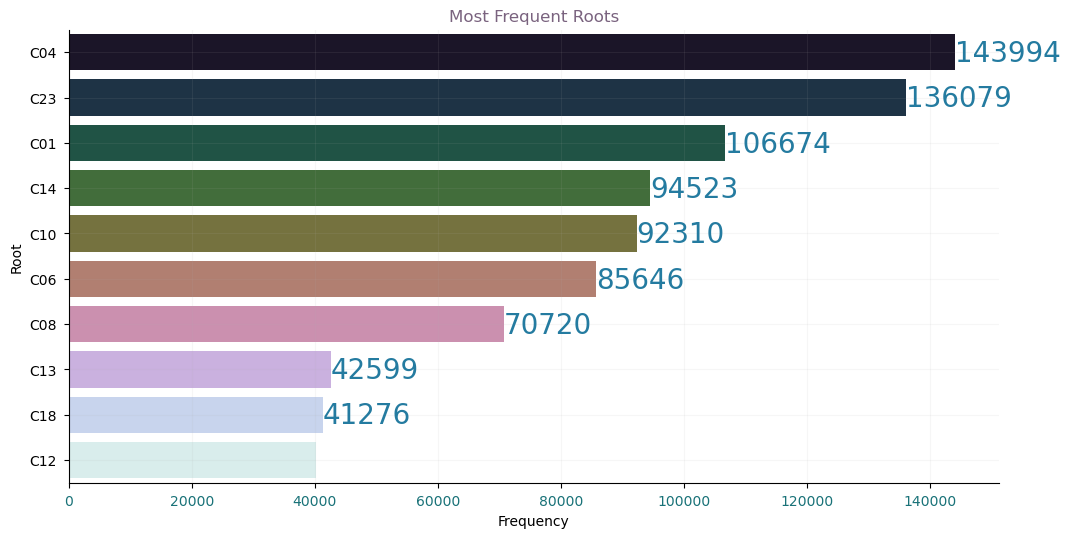

In [237]:
plt.figure(dpi=100)
sns.barplot(y="codes",x="count",data=codes.head(10),orient="h",palette="cubehelix")
ax = plt.gca()
ax.grid(alpha=0.10)
for patch ,lb in zip(ax.patches,ax.get_xticklabels()):
    x = patch.get_y() 
    h = patch.get_width()
    y = h
    text = int(h)
    ax.text(y, x+0.6,text , fontsize=20,color="#247ba0")
    lb.set_color("#197278")
plt.title("Most Frequent Roots", color='#7a637f')
plt.ylabel("Root")
plt.xlabel("Frequency")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


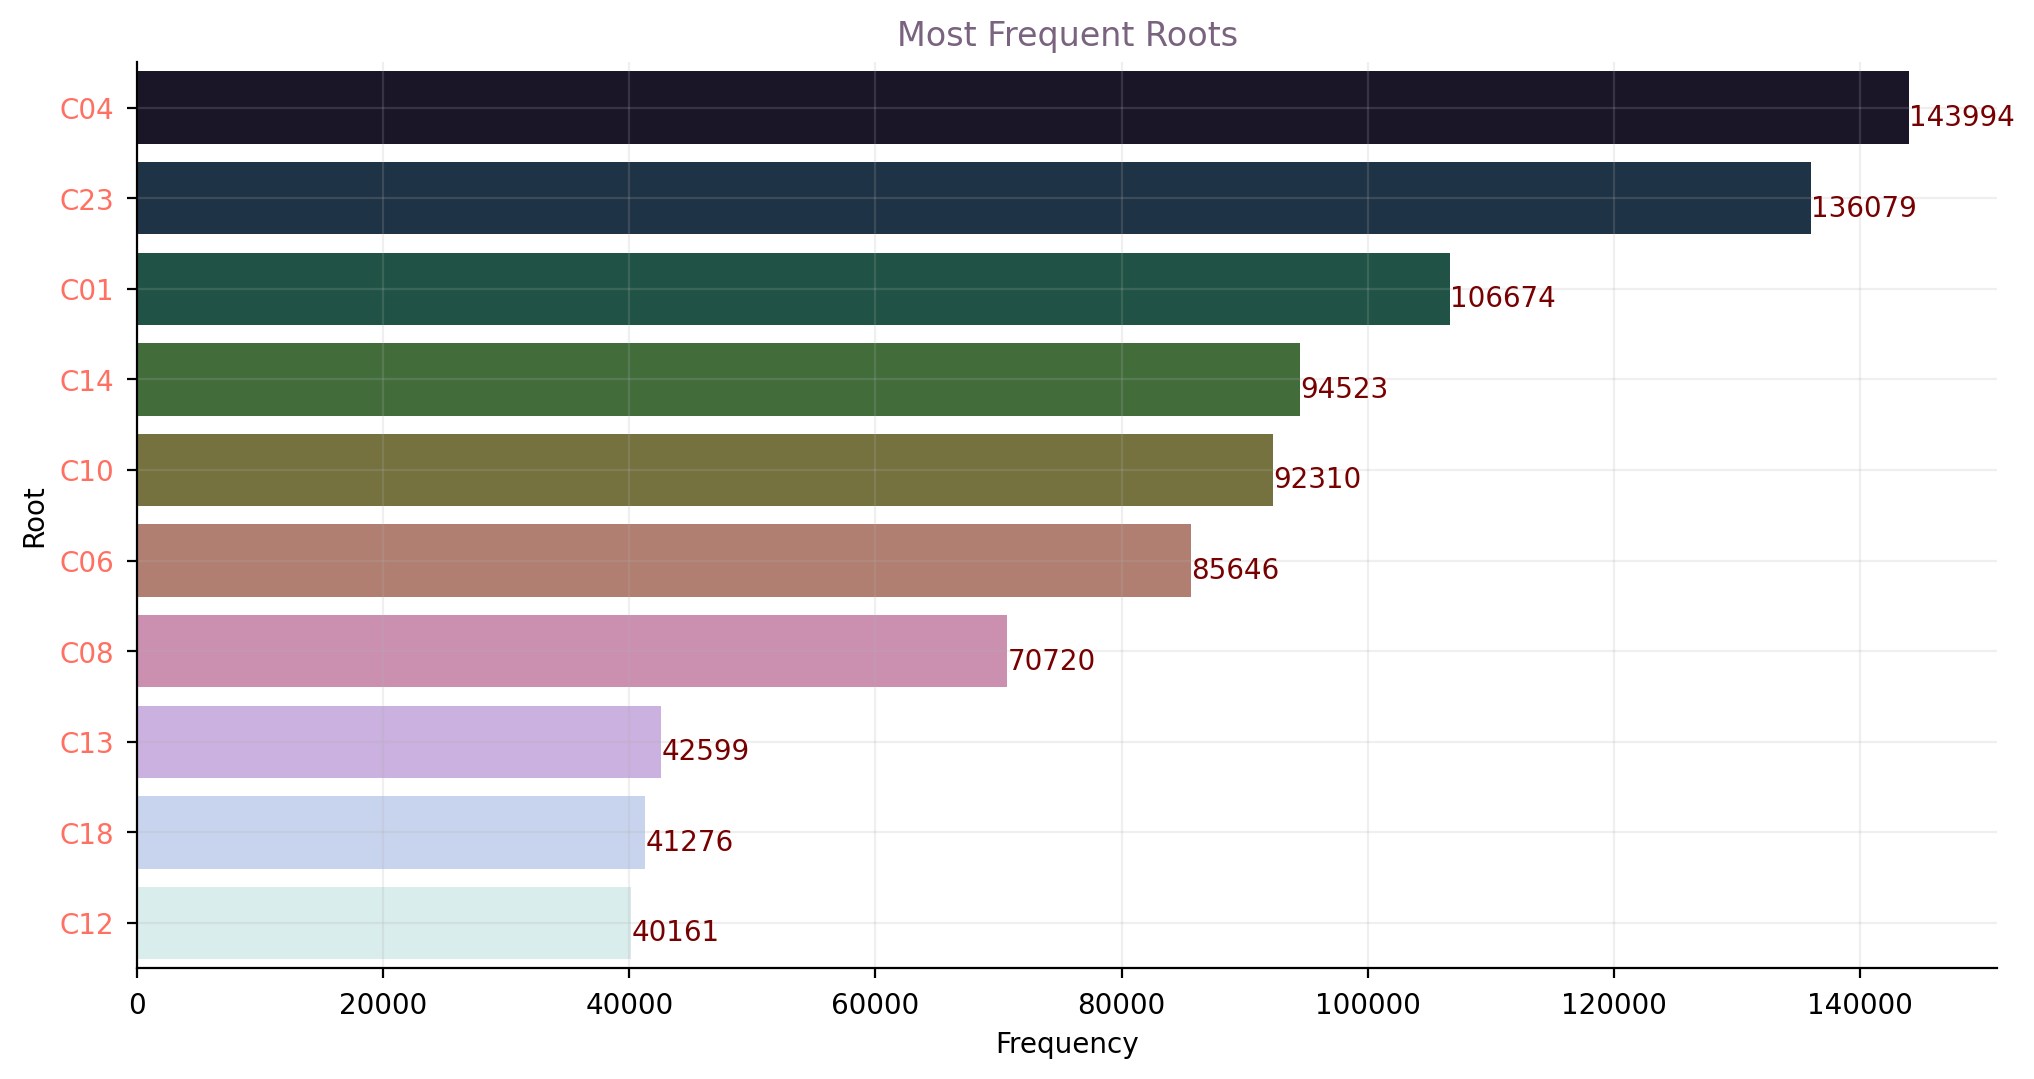

In [232]:
# plt.figure(dpi=200)
# sns.barplot("count","codes",
#             data=codes.head(10),
#             palette="cubehelix",
#             orient="h")
# ax = plt.gca()
# plt.grid(alpha=0.2)
# for patch, lb in zip(ax.patches, ax.get_yticklabels()):
#     x  = patch.get_y() + 0.6
#     h = patch.get_width()
#     y = h 
#     text = int(h)
#     ax.text(y, x, text, fontsize=10, color='#770000')
#     lb.set_color("#ff7062")
# plt.title("Most Frequent Roots", color='#7a637f')
# plt.ylabel("Root")
# plt.xlabel("Frequency")
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.show()


5. Find the 10 most common sponsors that are not pharmaceutical companies, along with the number
of clinical trials they have sponsored. Hint: For a basic implementation, you can assume that the
Parent Company column contains all possible pharmaceutical companies.


In [4]:
pharma.head()

,Company,Parent_Company,Penalty_Amount,Subtraction_From_Penalty,Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting,Penalty_Year,Penalty_Date,Offense_Group,Primary_Offense,Secondary_Offense,...,NAICS_Code,NAICS_Translation,HQ_Country_of_Parent,HQ_State_of_Parent,Ownership_Structure,Parent_Company_Stock_Ticker,Major_Industry_of_Parent,Specific_Industry_of_Parent,Info_Source,Notes
0,Abbott Laboratories,Abbott Laboratories,"$5,475,000",$0,"$5,475,000",2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,...,NaN,NaN,USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/abbott-laborato...,NaN
1,Abbott Laboratories Inc.,AbbVie,"$1,500,000,000",$0,"$1,500,000,000",2012,20120507,healthcare-related offenses,off-label or unapproved promotion of medical p...,NaN,...,NaN,NaN,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,http://www.justice.gov/opa/pr/abbott-labs-pay-...,NaN
2,Abbott Laboratories Inc.,AbbVie,"$126,500,000",$0,"$126,500,000",2010,20101207,government-contracting-related offenses,False Claims Act and related,NaN,...,NaN,NaN,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/pharmaceutical-...,NaN
3,"Abbott Laboratories Puerto Rico, Inc.",Abbott Laboratories,"$49,045",$0,"$49,045",2009,20090305,employment-related offenses,wage and hour violation,Fair Labor Standards Act,...,423450.0,"423450: Medical, Dental, and Hospital Equipmen...",USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,"March 7, 2017 download of a dataset posted by ...",Date and year are the Findings End Date in the...
4,Acclarent Inc.,Johnson & Johnson,"$18,000,000",$0,"$18,000,000",2016,20160722,government-contracting-related offenses,False Claims Act and related,NaN,...,NaN,NaN,USA,New Jersey,publicly traded,JNJ,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/johnson-johnson...,NaN


In [5]:
clinical_2021.head()

,0,1,2,3,4,5,6,7,8
0,Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
1,NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,NaN,NaN
2,NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",NaN
3,NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,NaN
4,NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",NaN


In [9]:
ph = pharma[["Parent_Company"]]
ph.columns = ["Sponsor"]
ph

,Sponsor
0,Abbott Laboratories
1,AbbVie
2,AbbVie
3,Abbott Laboratories
4,Johnson & Johnson
...,...
963,Purdue Pharma
964,Bristol-Myers Squibb
965,Johnson & Johnson
966,Endo International


In [10]:
ph.loc[ph["Sponsor"].str.contains("M.D. Anderson Cancer Center")]

,Sponsor


In [11]:
cT = clinical_2021[["Sponsor"]]
cT.columns = ["Sponsor"]

In [12]:
cT.loc[cT["Sponsor"].str.contains("M.D. Anderson Cancer Center")]

,Sponsor
121,M.D. Anderson Cancer Center
173,M.D. Anderson Cancer Center
338,M.D. Anderson Cancer Center
524,M.D. Anderson Cancer Center
588,M.D. Anderson Cancer Center
...,...
385122,M.D. Anderson Cancer Center
385733,M.D. Anderson Cancer Center
385836,M.D. Anderson Cancer Center
386175,M.D. Anderson Cancer Center


In [15]:
cT

,Sponsor
1,The University of Hong Kong
2,Duke University
3,Universidade Federal do Rio de Janeiro
4,Istanbul Medeniyet University
5,University of Roma La Sapienza
...,...
387257,University of the Balearic Islands
387258,Seattle Children's Hospital
387259,"National Research Center for Hematology, Russia"
387260,Stanford University


In [319]:
len(ph["Sponsor"].unique())

72

In [320]:
count = 0
len(cT["Sponsor"].unique())

34442

In [321]:
cT.shape

(387261, 1)

In [16]:
 cT.loc[cT["Sponsor"]=='M.D. Anderson Cancer Center']["Sponsor"].value_counts()


M.D. Anderson Cancer Center    2414
Name: Sponsor, dtype: int64

In [13]:
Sponsor = cT[~cT['Sponsor'].isin(pharma['Parent_Company'])]["Sponsor"].value_counts().reset_index()
Sponsor.columns = ['Sponsor','count']
Sponsor.head(10)

,Sponsor,count
0,National Cancer Institute (NCI),3218
1,M.D. Anderson Cancer Center,2414
2,Assistance Publique - Hôpitaux de Paris,2369
3,Mayo Clinic,2300
4,Merck Sharp & Dohme Corp.,2243
5,Assiut University,2154
6,Novartis Pharmaceuticals,2088
7,Massachusetts General Hospital,1971
8,Cairo University,1928
9,Hoffmann-La Roche,1828


In [14]:
Sponsor.head(10)

,Sponsor,count
0,National Cancer Institute (NCI),3218
1,M.D. Anderson Cancer Center,2414
2,Assistance Publique - Hôpitaux de Paris,2369
3,Mayo Clinic,2300
4,Merck Sharp & Dohme Corp.,2243
5,Assiut University,2154
6,Novartis Pharmaceuticals,2088
7,Massachusetts General Hospital,1971
8,Cairo University,1928
9,Hoffmann-La Roche,1828


In [15]:
cT[~cT["Sponsor"].isin(pharma["Parent_Company"])]

,Sponsor
1,The University of Hong Kong
2,Duke University
3,Universidade Federal do Rio de Janeiro
4,Istanbul Medeniyet University
5,University of Roma La Sapienza
...,...
387257,University of the Balearic Islands
387258,Seattle Children's Hospital
387259,"National Research Center for Hematology, Russia"
387260,Stanford University


In [56]:

new

,Parent_companey,Sponsor
0,Abbott Laboratories,NaN
1,AbbVie,The University of Hong Kong
2,AbbVie,Duke University
3,Abbott Laboratories,Universidade Federal do Rio de Janeiro
4,Johnson & Johnson,Istanbul Medeniyet University
...,...,...
387257,NaN,University of the Balearic Islands
387258,NaN,Seattle Children's Hospital
387259,NaN,"National Research Center for Hematology, Russia"
387260,NaN,Stanford University


5. Find the 10 most common sponsors that are not pharmaceutical companies, along with the number
of clinical trials they have sponsored. Hint: For a basic implementation, you can assume that the
Parent Company column contains all possible pharmaceutical companies

In [16]:
new = pd.concat([ph,cT],axis=1)
new.columns = ["Parent_companey","Sponsor"]
new = new[~new["Sponsor"].isin(new["Parent_companey"])]["Sponsor"].value_counts().reset_index()
new.columns = ["Sponsor","count"]
new.head()

,Sponsor,count
0,National Cancer Institute (NCI),3218
1,M.D. Anderson Cancer Center,2414
2,Assistance Publique - Hôpitaux de Paris,2369
3,Mayo Clinic,2300
4,Merck Sharp & Dohme Corp.,2243


In [18]:
s = new.head(10)


Text(0.5, 0, 'Count')

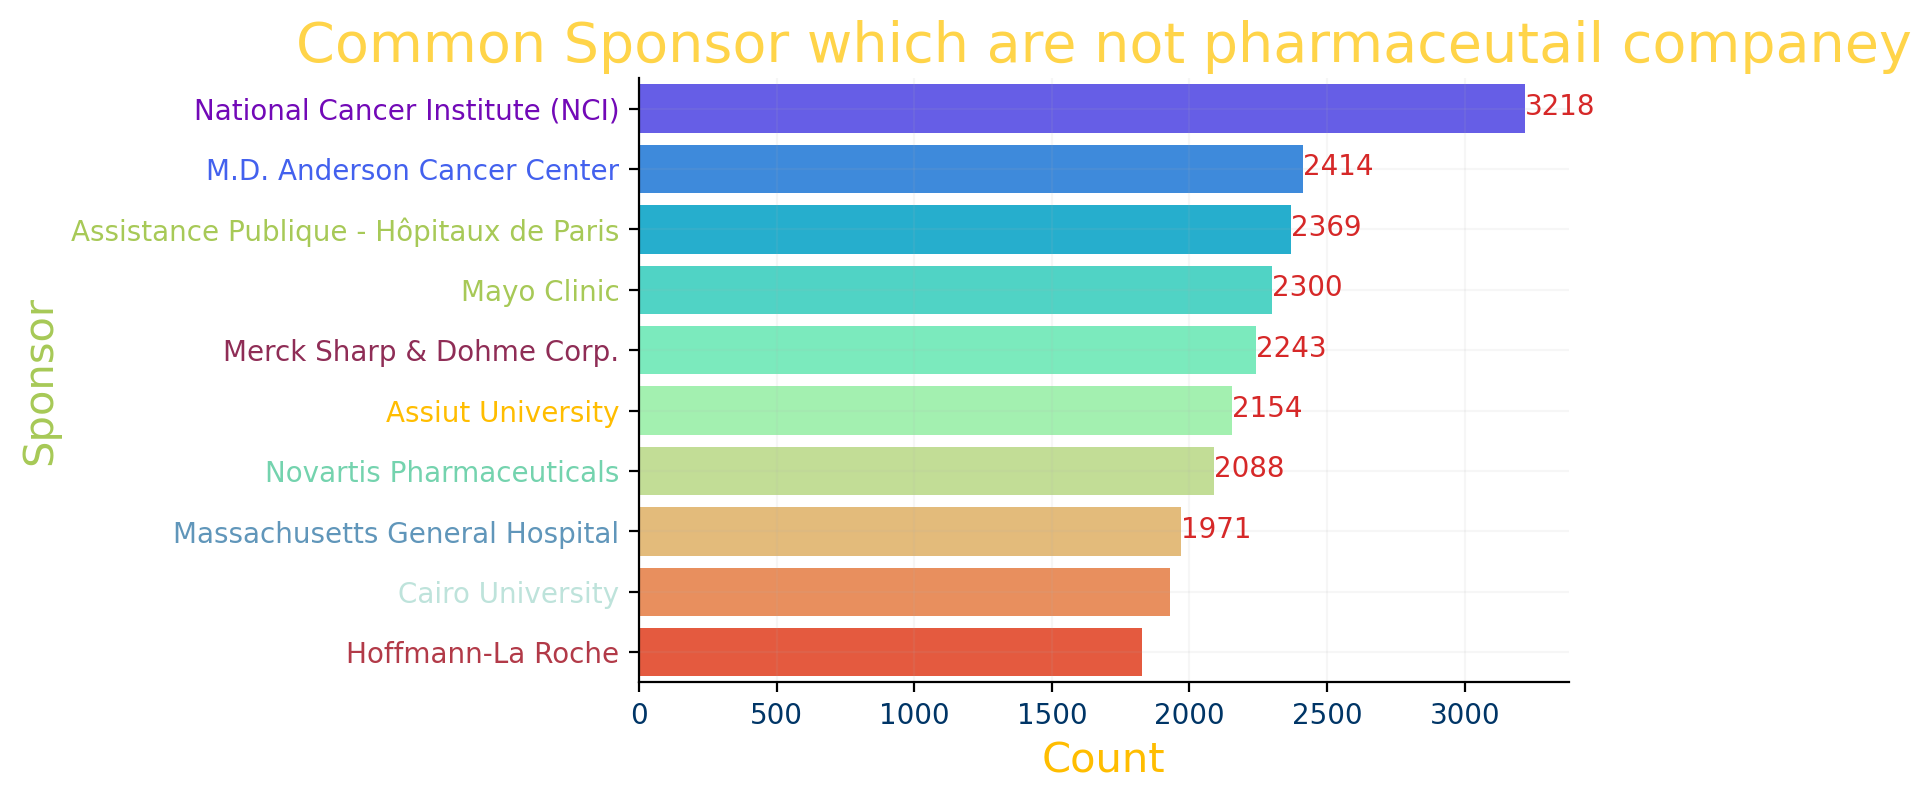

In [32]:
plt.figure(dpi=200)
sns.barplot(y="Sponsor",x="count",data=s,palette="rainbow",orient="h")
ax  = plt.gca()
plt.grid(alpha=0.10)
for patch, lb in zip(ax.patches,ax.get_xticklabels()):
    x = patch.get_y()+0.5
    h = patch.get_width()
    y = h
    text = int(h)
    
    ax.text(y,x,text,color="#d62828")
    lb.set_color("#003566")
ax.set_title("Common Sponsor which are not pharmaceutail companey",fontsize=20,color="#ffd449")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
color = ["#7209b7","#4361ee","#a7c957","#a7c957","#8f2d56","#ffbd00","#74d3ae","#6096ba","#bee3db","#b23a48"]
for i,xl in enumerate(ax.get_yticklabels()):
    xl.set_color(color[i])
ax.set_ylabel("Sponsor",fontsize=15,color="#a7c957")
ax.set_xlabel("Count",fontsize=15,color="#ffbd00")

# Plot number of completed studies each month in a given year – for the submission dataset, the year
is 2021. You need to include your visualization as well as a table of all the values you have plotted
for each month

In [36]:
clinical_2021.head()

,id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
1,NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,NaN,NaN
2,NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",NaN
3,NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,NaN
4,NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",NaN
5,NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,"Diverticular Diseases,Diverticulum,Diverticulosis",NaN


In [124]:
studies = clinical_2021["Completion"].str.split(" ",expand=True)

In [125]:
studies.columns  = ["month", "year"]

In [126]:
studies.head()

,month,year
1,Nov,2021
2,Jul,2020
3,Jan,2018
4,Dec,2014
5,Sep,2020


In [127]:
studies.shape

(387261, 2)

In [128]:
Month = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]

In [129]:
status = studies.loc[(studies["year"]=="2021")&(clinical_2021["Status"]=='Completed')]
status = status.groupby("month").count()
status = status.loc[Month].reset_index()
status.head()

,month,year
0,Jan,1131
1,Feb,934
2,Mar,1227
3,Apr,967
4,May,984


In [95]:
# completed_studies = studies[(studies['year'] == '2021')&(clinical_2021['Status']=="Completed")]\
#                         .groupby('month')\
#                         .count()\
#                         .loc[Month]\
#                         .reset_index()


In [134]:
status.columns = ["Month", "count"]

In [96]:
# completed_studies.head()

,Month,count
0,Jan,307
1,Feb,238
2,Mar,246
3,Apr,154
4,May,132


In [135]:
status.head(10)

,Month,count
0,Jan,1131
1,Feb,934
2,Mar,1227
3,Apr,967
4,May,984
5,Jun,1094
6,Jul,819
7,Aug,700
8,Sep,528
9,Oct,187


C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Month')

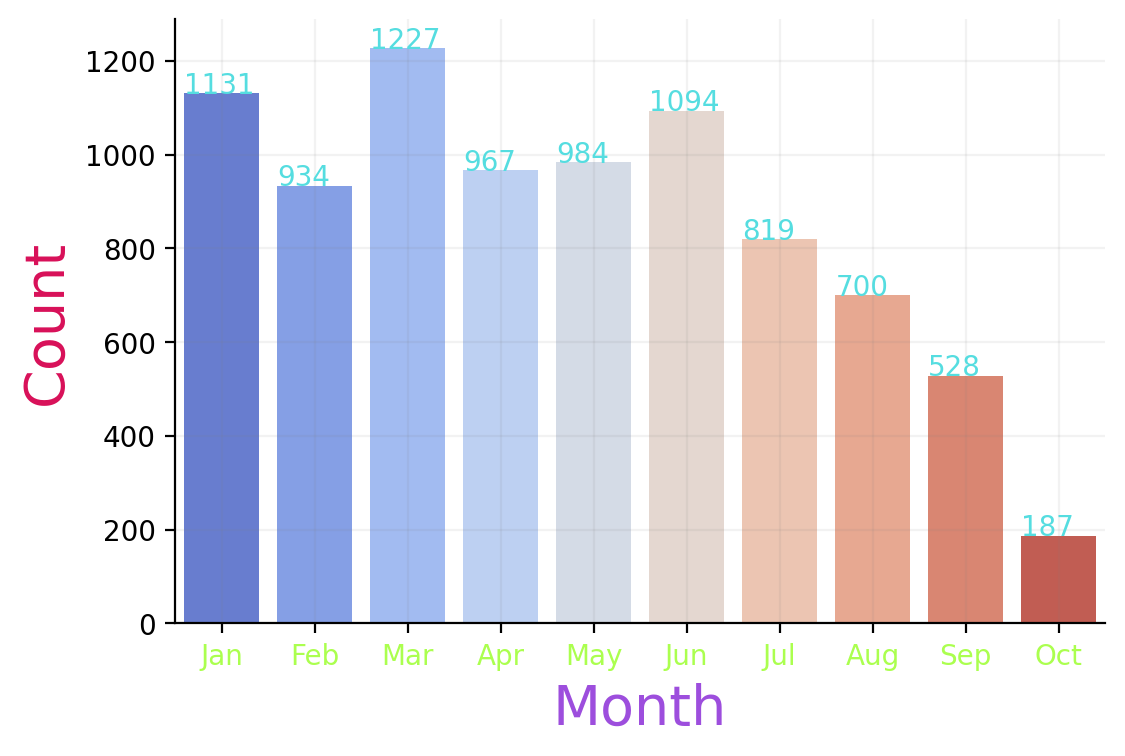

In [148]:
plt.figure(dpi=200)
sns.barplot("Month","count",data=status.head(10),palette="coolwarm")
ax =plt.gca()
plt.grid(alpha=.10,color="Gray")

for i,(patch,xl) in enumerate(zip(ax.patches,ax.get_xticklabels())):
    x = patch.get_x()
    h = patch.get_height()
    text = int(h)
    ax.text(x,h,text,color="#55dde0")
    xl.set_color("#abff4f")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel("Count",fontsize=20,color="#d81159")
ax.set_xlabel("Month",fontsize=20,color="#9d4edd")
